In [468]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [469]:
!ls "/content/drive/MyDrive/BankChurners.csv"

/content/drive/MyDrive/BankChurners.csv


In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [471]:
df=pd.read_csv("/content/drive/MyDrive/BankChurners.csv")
df=df.iloc[:,:-2]
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00


In [472]:
df.shape

(10127, 21)

Dividing the dataset into train and test

---









In [473]:
X=df.drop("Attrition_Flag",axis=1)
Y=df["Attrition_Flag"]

In [474]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=110,stratify=Y)


Analyzing the dataset.

---






In [475]:
print("Train dataset",x_train.shape)
print("Test dataset",x_test.shape)

Train dataset (7088, 20)
Test dataset (3039, 20)


In [476]:
def check_datatye(dataframe):
  categorical,numerical=[],[]
  for col_names in dataframe.columns:
    if(dataframe[col_names].dtypes=="object"):
      categorical.append(col_names)
    else:
      numerical.append(col_names)
  return categorical,numerical

categorical,numerical=check_datatye(x_train)
print("There are {} categorical,and {} numerical independent variables ".format(len(categorical),len(numerical)),"\n")
print("Categorical columns are",categorical)
print("Numerical columns are", numerical)

There are 5 categorical,and 15 numerical independent variables  

Categorical columns are ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical columns are ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [477]:
def check_unique_categorical(dataframe,categorical):
  for col_name in categorical:
    print(col_name,":",dataframe[col_name].unique())

check_unique_categorical(x_train,categorical)

Gender : ['F' 'M']
Education_Level : ['High School' 'Uneducated' 'Post-Graduate' 'Graduate' 'College' 'Unknown'
 'Doctorate']
Marital_Status : ['Single' 'Married' 'Divorced' 'Unknown']
Income_Category : ['Less than $40K' '$60K - $80K' 'Unknown' '$80K - $120K' '$120K +'
 '$40K - $60K']
Card_Category : ['Blue' 'Silver' 'Gold' 'Platinum']


In [478]:
x_train.describe(include='O')

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,7088,7088,7088,7088,7088
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,3787,2181,3242,2479,6604


In [479]:
x_train.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00,7088.00
mean,739005280.37,46.26,2.34,35.91,3.81,2.33,2.46,8577.18,1165.82,7411.36,0.76,4424.06,64.98,0.71,0.28
std,36802616.57,8.09,1.30,8.00,1.56,1.01,1.10,9083.21,813.29,9083.37,0.22,3407.55,23.61,0.24,0.28
min,708083283.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,713029983.00,41.00,1.00,31.00,3.00,2.00,2.00,2544.75,430.50,1295.00,0.63,2165.00,45.00,0.58,0.03
50%,717859795.50,46.00,2.00,36.00,4.00,2.00,2.00,4479.00,1279.00,3428.00,0.74,3913.00,67.00,0.70,0.18
75%,772689745.50,52.00,3.00,40.00,5.00,3.00,3.00,10798.50,1787.25,9577.00,0.86,4759.00,81.00,0.82,0.51
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,138.00,3.71,1.00


*   In most of the columns mean is greater than the median and there's a huge difference between 75 percentile of the data and the maximum value. Hence outlier is present.





In [480]:
def check_mising_val(dataframe):
  if(dataframe.isnull().sum().sum()==0):
    print("No missing values")
  else:
    print(dataframe.isnull().sum())

check_mising_val(x_train)
check_mising_val(y_train)

No missing values
No missing values


In [481]:
def check_imbalance(dataframe):
  list_elements=dataframe.value_counts().to_list()
  total=y_train.shape[0]
  for i in range(0,len(list_elements)):
    list_elements[i]=((list_elements[i]/total)*100)
    if (list_elements[i]>((100/len(list_elements))+25)):
      print("Dataset is Imbalanced \n")
      print(dataframe.value_counts())
      break

check_imbalance(y_train)

Dataset is Imbalanced 

Existing Customer    5949
Attrited Customer    1139
Name: Attrition_Flag, dtype: int64


Feature Selection

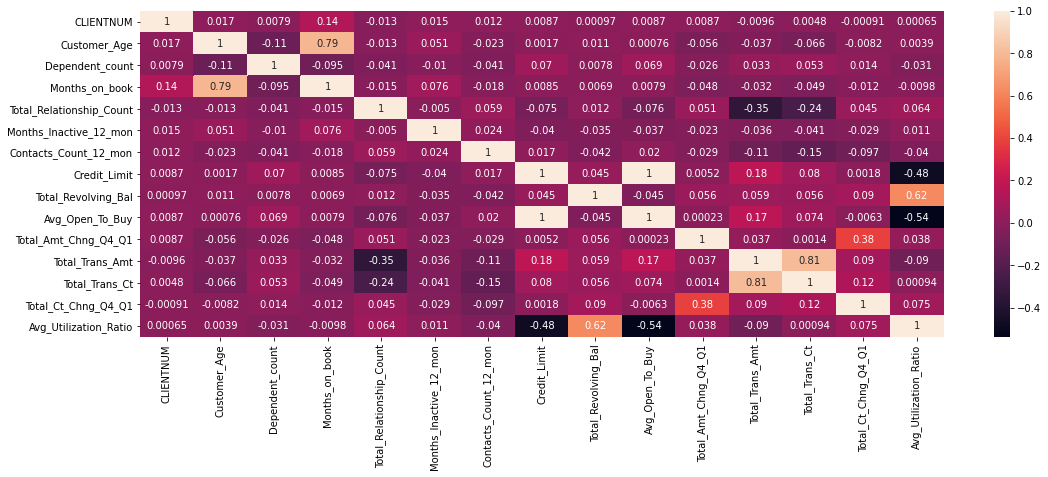

In [482]:
plt.figure(figsize=(18,6))
sns.heatmap(x_train.corr(),annot=True)

*   Highest positive correlation is between Total_Trans_Amt and Total_Trans_Ct
*   Next highest positive correlation is between Customer_Age and Months_on_book
*   Highest negative correlation is between Avg_Utilization_Ratio and Credit_Limit, Avg_Open_To_Buy, Total_Revolving_Bal 


In [483]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
XX = x_train[numerical] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = XX.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(XX.values, i) 
                          for i in range(len(XX.columns))] 
  
print(vif_data)

                     feature   VIF
0                  CLIENTNUM 78.34
1               Customer_Age 83.40
2            Dependent_count  4.32
3             Months_on_book 56.82
4   Total_Relationship_Count  7.91
5     Months_Inactive_12_mon  6.36
6      Contacts_Count_12_mon  6.16
7               Credit_Limit   inf
8        Total_Revolving_Bal   inf
9            Avg_Open_To_Buy   inf
10      Total_Amt_Chng_Q4_Q1 15.01
11           Total_Trans_Amt  8.89
12            Total_Trans_Ct 25.93
13       Total_Ct_Chng_Q4_Q1 12.10
14     Avg_Utilization_Ratio  5.82


*   We can drop the below columns:- 
*   CLIENTNUM, Customer_Age, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Ct
  



In [484]:
x_train=x_train.drop(["CLIENTNUM","Customer_Age","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Ct"],axis=1)
x_test=x_test.drop(["CLIENTNUM","Customer_Age","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Ct"],axis=1)

In [485]:
print(x_train.shape,x_test.shape)

(7088, 14) (3039, 14)


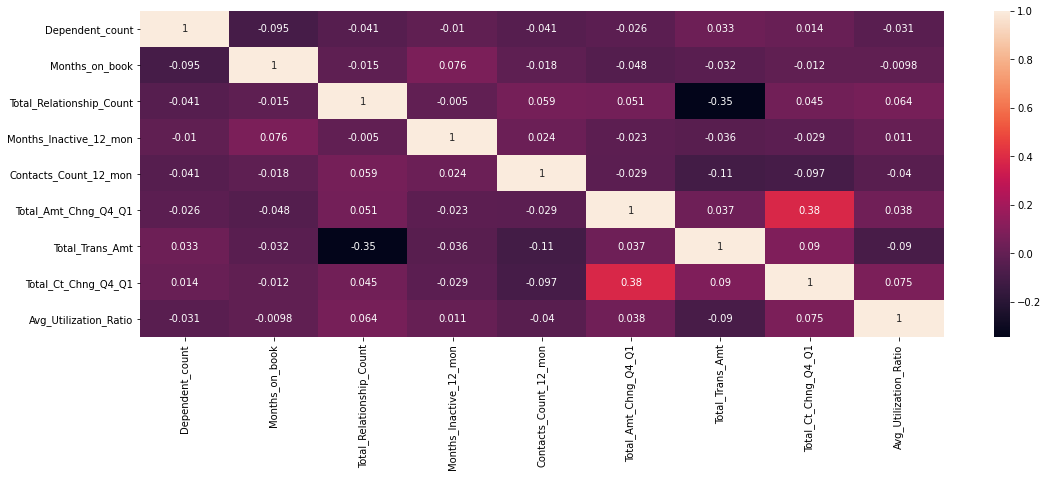

In [486]:
num=['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
plt.figure(figsize=(18,6))
sns.heatmap(x_train[num].corr(),annot=True)

Feature Engineering

---

---





In [487]:
x_train[num].head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9342,3,34,2,2,2,0.86,12739,0.88,0.00
301,2,36,5,3,2,0.87,1338,1.31,0.60
3643,3,38,4,6,4,0.47,3609,0.55,0.05
956,3,36,5,3,2,0.91,1665,0.80,0.09
7141,2,30,6,3,1,0.89,4277,0.85,0.08


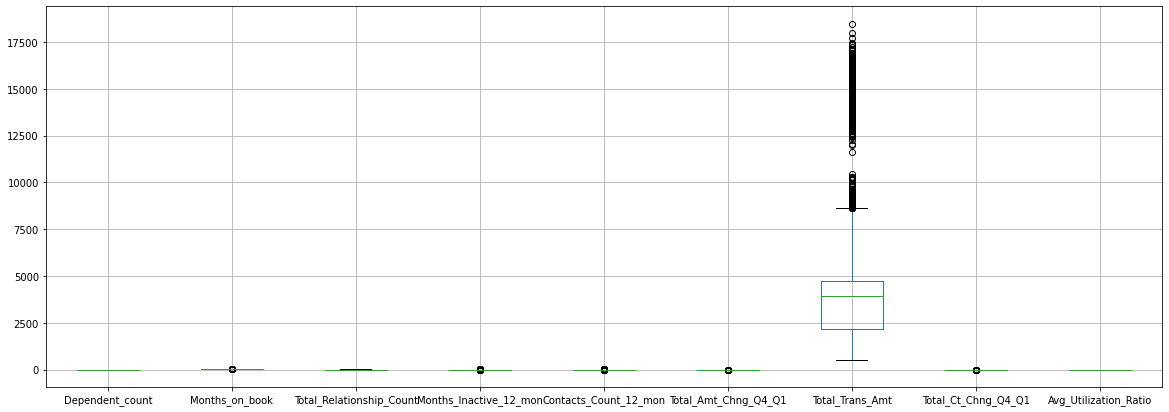

In [488]:
plt.figure(figsize=(20,7))
x_train[num].boxplot()

*   MinMaxScaler

In [489]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train[num]=mm.fit_transform(x_train[num])
x_test[num]=mm.transform(x_test[num])

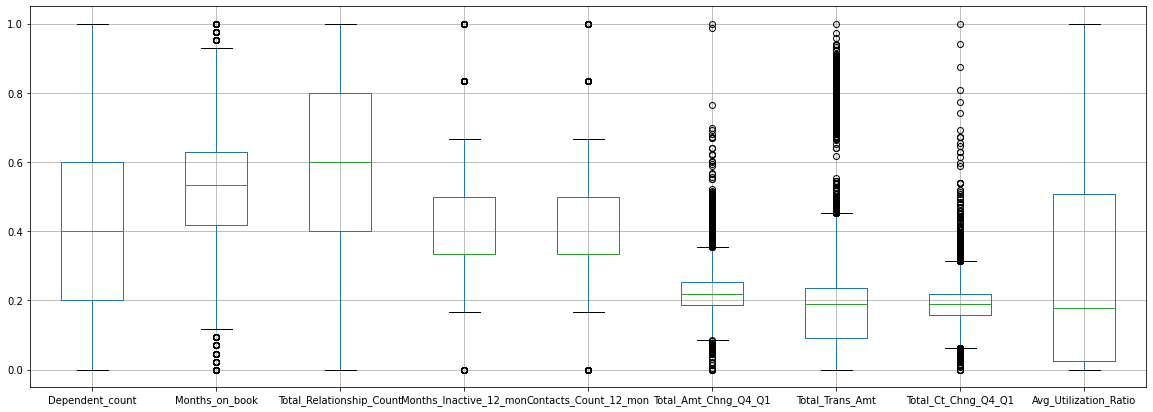

In [490]:
plt.figure(figsize=(20,7))
x_train[num].boxplot()

*   Categorical Encoding

In [492]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train=pd.DataFrame(lr.fit_transform(y_train),columns=["Attrition_Flag"])
y_test=pd.DataFrame(lr.transform(y_test),columns=["Attrition_Flag"])


In [493]:
y_train.head(3)

,Attrition_Flag
0,1
1,1
2,1


In [494]:
x_train_dummy=pd.get_dummies(x_train,columns=categorical)
x_test_dummy=pd.get_dummies(x_test,columns=categorical)
x_train_dummy.shape

(7088, 32)

In [495]:
x_train_dummy.head(3)

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9342,0.60,0.49,0.20,0.33,0.33,0.25,0.68,0.24,0.00,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
301,0.40,0.53,0.80,0.50,0.33,0.26,0.05,0.35,0.61,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3643,0.60,0.58,0.60,1.00,0.67,0.14,0.17,0.15,0.05,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [496]:
x_test_dummy.head(3)

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
756,0.20,0.28,1.00,0.50,0.50,0.27,0.08,0.18,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2321,0.40,0.19,0.60,0.17,0.83,0.48,0.12,0.25,0.20,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1215,0.00,0.53,0.40,0.17,0.50,0.12,0.06,0.13,0.13,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


Ensemble Model for Imbalanced Dataset

---

---





****XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)****


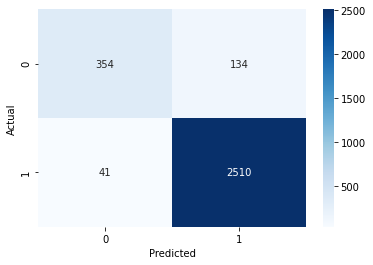

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       488
           1       0.95      0.98      0.97      2551

    accuracy                           0.94      3039
   macro avg       0.92      0.85      0.88      3039
weighted avg       0.94      0.94      0.94      3039

****AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)****


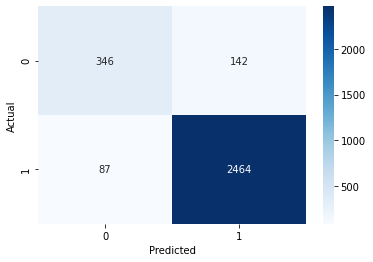

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       488
           1       0.95      0.97      0.96      2551

    accuracy                           0.92      3039
   macro avg       0.87      0.84      0.85      3039
weighted avg       0.92      0.92      0.92      3039

****RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)****


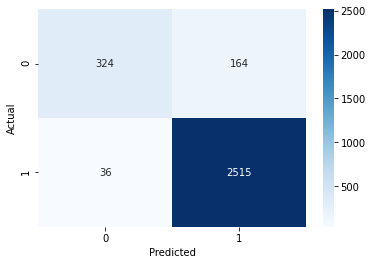

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       488
           1       0.94      0.99      0.96      2551

    accuracy                           0.93      3039
   macro avg       0.92      0.82      0.86      3039
weighted avg       0.93      0.93      0.93      3039

****GaussianNB(priors=None, var_smoothing=1e-09)****


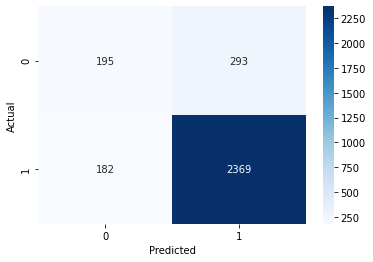

              precision    recall  f1-score   support

           0       0.52      0.40      0.45       488
           1       0.89      0.93      0.91      2551

    accuracy                           0.84      3039
   macro avg       0.70      0.66      0.68      3039
weighted avg       0.83      0.84      0.84      3039

****SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)****


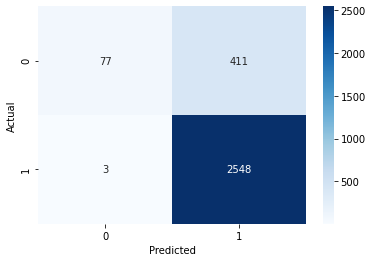

              precision    recall  f1-score   support

           0       0.96      0.16      0.27       488
           1       0.86      1.00      0.92      2551

    accuracy                           0.86      3039
   macro avg       0.91      0.58      0.60      3039
weighted avg       0.88      0.86      0.82      3039



In [497]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix

models=[XGBClassifier(),AdaBoostClassifier(),RandomForestClassifier(n_estimators=110,class_weight='balanced'),GaussianNB(),SVC()]
for i in models:
  print("****{}****".format(i))
  i.fit(x_train_dummy, y_train)
  pred=i.predict(x_test_dummy)
  cnf_matrix=confusion_matrix(y_test,pred)
  sns.heatmap(cnf_matrix,annot=True, fmt='', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  print(classification_report(y_test,pred))



*   From the above result, it's clearly visible that XGBClassifier is better in predicting the customers who are likely to churn with an F1 score of 80% and recall of 73%.
*   The second best is RandomForestClassifier with F1 score of 76% and recall of 66%





SMOTE-NC for imbalanced dataset

---



In [498]:
x_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7088 entries, 9342 to 5612
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dependent_count                 7088 non-null   float64
 1   Months_on_book                  7088 non-null   float64
 2   Total_Relationship_Count        7088 non-null   float64
 3   Months_Inactive_12_mon          7088 non-null   float64
 4   Contacts_Count_12_mon           7088 non-null   float64
 5   Total_Amt_Chng_Q4_Q1            7088 non-null   float64
 6   Total_Trans_Amt                 7088 non-null   float64
 7   Total_Ct_Chng_Q4_Q1             7088 non-null   float64
 8   Avg_Utilization_Ratio           7088 non-null   float64
 9   Gender_F                        7088 non-null   uint8  
 10  Gender_M                        7088 non-null   uint8  
 11  Education_Level_College         7088 non-null   uint8  
 12  Education_Level_Doctorate      

In [499]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[i for i in range(9,32)], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(x_train_dummy, y_train)
print(X_resampled.shape)

(11898, 32)


In [500]:
X_df=pd.DataFrame(X_resampled,columns=x_train_dummy.columns)
Y_df=pd.DataFrame(y_resampled,columns=["Attrition_Flag"])

In [501]:
X_df.head(3)

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.60,0.49,0.20,0.33,0.33,0.25,0.68,0.24,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1,0.40,0.53,0.80,0.50,0.33,0.26,0.05,0.35,0.61,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.60,0.58,0.60,1.00,0.67,0.14,0.17,0.15,0.05,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00


****XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)****


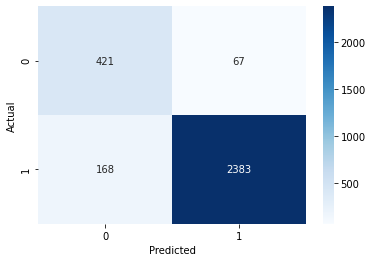

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       488
           1       0.97      0.93      0.95      2551

    accuracy                           0.92      3039
   macro avg       0.84      0.90      0.87      3039
weighted avg       0.93      0.92      0.93      3039

****AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)****


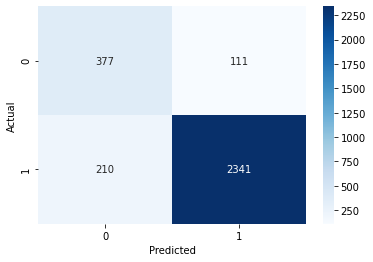

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       488
           1       0.95      0.92      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.80      0.85      0.82      3039
weighted avg       0.90      0.89      0.90      3039

****RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)****


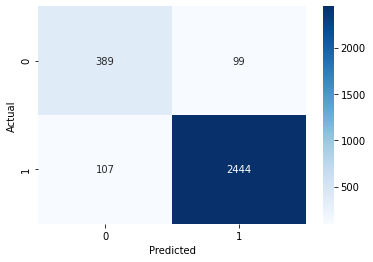

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       488
           1       0.96      0.96      0.96      2551

    accuracy                           0.93      3039
   macro avg       0.87      0.88      0.88      3039
weighted avg       0.93      0.93      0.93      3039

****GaussianNB(priors=None, var_smoothing=1e-09)****


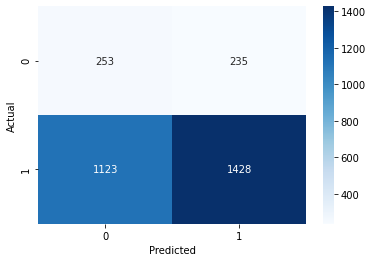

              precision    recall  f1-score   support

           0       0.18      0.52      0.27       488
           1       0.86      0.56      0.68      2551

    accuracy                           0.55      3039
   macro avg       0.52      0.54      0.47      3039
weighted avg       0.75      0.55      0.61      3039

****SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)****


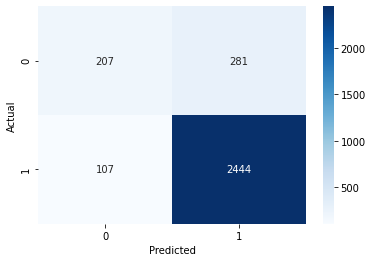

              precision    recall  f1-score   support

           0       0.66      0.42      0.52       488
           1       0.90      0.96      0.93      2551

    accuracy                           0.87      3039
   macro avg       0.78      0.69      0.72      3039
weighted avg       0.86      0.87      0.86      3039



In [502]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix

models=[XGBClassifier(),AdaBoostClassifier(),RandomForestClassifier(n_estimators=110,class_weight='balanced'),GaussianNB(),SVC()]
for i in models:
  print("****{}****".format(i))
  i.fit(X_df, Y_df)
  pred=i.predict(x_test_dummy)
  cnf_matrix=confusion_matrix(y_test,pred)
  sns.heatmap(cnf_matrix,annot=True, fmt='', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  print(classification_report(y_test,pred))

*   After minority oversampling using SMOTE-NC it was evident that two model performed well and they are XGBCLassifier and RandomForest.
*   RandomForest: False Positive is 99 and False Negative is 107
*   XGB: False Positive is 67 and False Negative is 168
*   Itcan be inferred, XGB False positive is less compared to RandomForest False Positive whereas vice versa for False Negative.
*   As we want to withold the customers who are likely to churn then the best model is where the False Positive and False Negative is very less but if either of the two needs to be prioritized, I'll choose False Positive to be less.
*   Hence, I select XGBClassifier as my model as comparatively it's predicting 32 correct result of customers who are likely to be churn on risk of offering benefit plans to 61 existing customers. This will also increase the likelyhood of those existing 61 customers to be a life long holder of the service offered.




Hypertuning XGBClassifier on SMOTE-NC oversampled dataset

---





In [507]:
from sklearn.model_selection import RandomizedSearchCV
grid={'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],"max_depth": range(3,10,2),'min_child_weight':[4,5,6],"ccp_alpha" : [0,1,2],"n_estimators": range(60,220,20),"learning_rate" : [1e-3, 1e-1, 1e-2,'log-uniform']}
random=RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=grid, n_jobs=-1, cv=10, scoring='roc_auc')
random.fit(X_df, Y_df)
print(random.best_score_,random.best_params_)
print(random.best_estimator_)

0.9955974508638867 {'reg_alpha': 0.1, 'n_estimators': 180, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.1, 'ccp_alpha': 0}
XGBClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


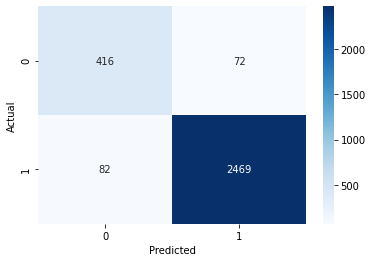

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       488
           1       0.97      0.97      0.97      2551

    accuracy                           0.95      3039
   macro avg       0.90      0.91      0.91      3039
weighted avg       0.95      0.95      0.95      3039



In [512]:
xgb_model2=XGBClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_model2.fit(X_df, Y_df)
xgb_pred2=xgb_model2.predict(x_test_dummy)
xgb_cnf_matrix2=confusion_matrix(y_test,xgb_pred2)
sns.heatmap(xgb_cnf_matrix2,annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,xgb_pred2))



*   On hypertuning the model, I was able to increase the performance from f1 score of 78 to 84%  and overall accuracy to 95%.

